# Praca Domowa 6

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Zadania


## Zadanie 1

a) Narysować wykres y=x^3+1 dla x z przedziału [-3, 3]. Dodać wycentrowany tytuł oraz opisy osi.

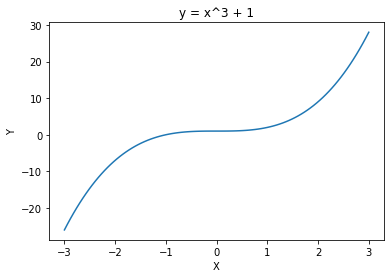

In [6]:
x = np.linspace(-3,3,100)
y = np.power(x,3)+1
plt.plot(x,y)
plt.title("y = x^3 + 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

b) Do tego samego wykresu dodać wybraną inną funkcję i oznaczyć ją linią o innym kolorze i grubości. Dodać legendę.

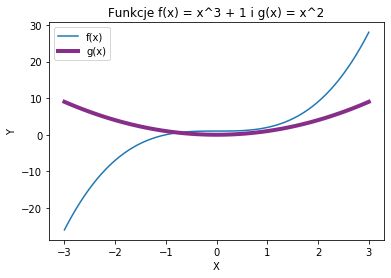

In [7]:
f = y
plt.plot(x,f)
g = np.power(x,2)
plt.plot(x,g, lw = 4, color = "#872e8a")
plt.title("Funkcje f(x) = x^3 + 1 i g(x) = x^2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["f(x)","g(x)"])
plt.show()

c) Pokazać wykresy z a) i b) osobno używając funkcji subplot().

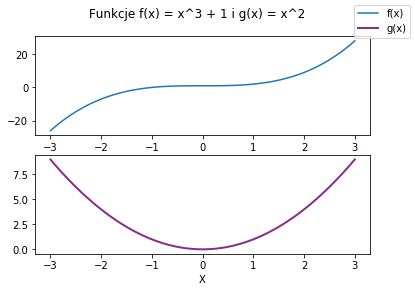

In [8]:
fig,ax = plt.subplots(2,1)
fig.suptitle("Funkcje f(x) = x^3 + 1 i g(x) = x^2")
ax[0].plot(x,f)
ax[1].plot(x,g,lw = 2, color = "#872e8a")
fig.legend(["f(x)","g(x)"])
plt.xlabel("X")
plt.show()

# Zadanie 2

a) Narysować wykres słupkowy na podanych danych. 

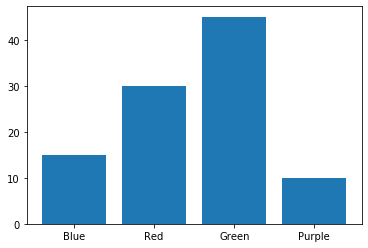

In [9]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]
plt.bar(labels, sizes)
plt.show()


b) Znaleźć sposób (w internecie) na narysowanie wykresu kołowego na podanych danych.


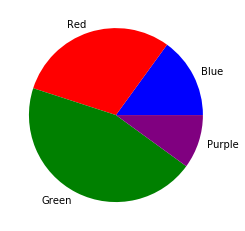

In [48]:
plt.pie(sizes, labels = labels, colors = labels)
plt.show()

# Zadanie 3

Poprawić wykres tak, aby łatwiej było odczytać w którym województwie śmiertelność wzrosła najbardziej.
Jest przynajmniej kilka innych podejść: scatterplot z latami na osi OX/OY, odcinki zaczynające się w danych ze średniej a kończące w 2020.
Jestem też ciekawa Waszych innych pomysłów.

![https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png](https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png)

Źródło: https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png

Jeśli bardzo chcemy pokazać liczby zgonów, to możemy użyć poniższego wykresu. Ma on jednak wadę. Długość odcinka jest większa dla województw o większej populacji. 

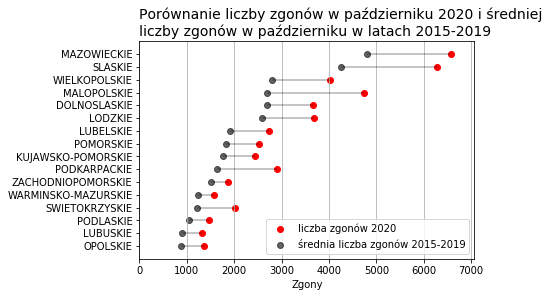

In [100]:
import pandas as pd # potrzebne do sortowania danych

wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE", "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE", "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]

l_2020 = [1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665]

l_2015_2019 = [1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683]

df = pd.DataFrame({"wojewodztwo":wojewodztwo,
                   "l_2015_2019":l_2015_2019,
                   "l_2020":l_2020})
df = df.sort_values(by =  "l_2015_2019")

plt.hlines(y = df["wojewodztwo"],
           xmax = df["l_2020"],
           xmin = df["l_2015_2019"],
          alpha = 0.3)

plt.scatter(df["l_2020"],df["wojewodztwo"],
            label = "liczba zgonów 2020",
           color = "red")

plt.scatter(df["l_2015_2019"],df["wojewodztwo"], 
            label = "średnia liczba zgonów 2015-2019",
           color = "black",
           alpha = 0.6)

plt.grid(True, axis = 'x')
plt.xlim(0,max(df["l_2020"])+500)
plt.xlabel("Zgony")
plt.legend()
plt.title("Porównanie liczby zgonów w październiku 2020 i średniej \nliczby zgonów w październiku w latach 2015-2019", fontsize = 14, loc = "left")
plt.show()

Aby tego uniknąć, możemy utworzyć wykres zmiany śmiertelności w procentach dla każdego województwa.

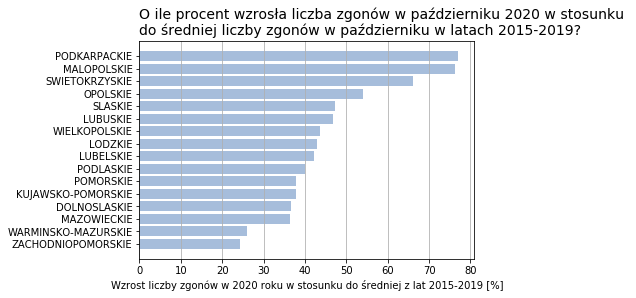

In [102]:
wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE", "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE", "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]

l_2020 = [1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665]

l_2015_2019 = [1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683]

df = pd.DataFrame({"wojewodztwo":wojewodztwo,
                   "l_2015_2019":l_2015_2019,
                   "l_2020":l_2020})

df["zmiana"] = (df["l_2020"] - df["l_2015_2019"]) / df["l_2015_2019"] * 100
df = df.sort_values(by = "zmiana")

plt.grid(axis = 'x')

plt.barh(y = df["wojewodztwo"], width = df["zmiana"], color = "#a6bddb")
plt.xlabel("Wzrost liczby zgonów w 2020 roku w stosunku do średniej z lat 2015-2019 [%]")
plt.title("O ile procent wzrosła liczba zgonów w październiku 2020 w stosunku \ndo średniej liczby zgonów w październiku w latach 2015-2019?", fontsize = 14, loc = "left")

plt.show()

Na wykresie widzimy, że najbardziej liczba zgonów wzrosła w województwie podkarpackim, które na poprzednim wykresie znajdowało się mniej więcej w połowie stawki.

# Zadanie 4

Zrobić własny wykres w stylu xkcd dotyczący wizualzacji danych. Może być bardzo luźno związany.

Jeśli ktoś nie trafił na komiksy xkcd, to polecam przejrzeć zajrzeć na stronę Randalla Munroe: https://xkcd.com/

Tu kilka przykładów, które mogą być inspiracją albo chociaż rozrywką:
- https://xkcd.com/688/
- https://xkcd.com/1597/ - True story jak Wam pokazałam gita :(
- https://xkcd.com/1945/

Matplotlib pozwala na proste tworzenie wykresów w stylu xkcd, służy do tego funkcja `xkcd()` z `matplotlib.pyplot`.
Warto zajrzeć do dokumentacji: https://matplotlib.org/gallery/showcase/xkcd.html
Mój przykład umieściłam poniżej.

Uwaga, w szczególności styl działa też z wykresami kołowymi i słupkowymi.

### Przykład

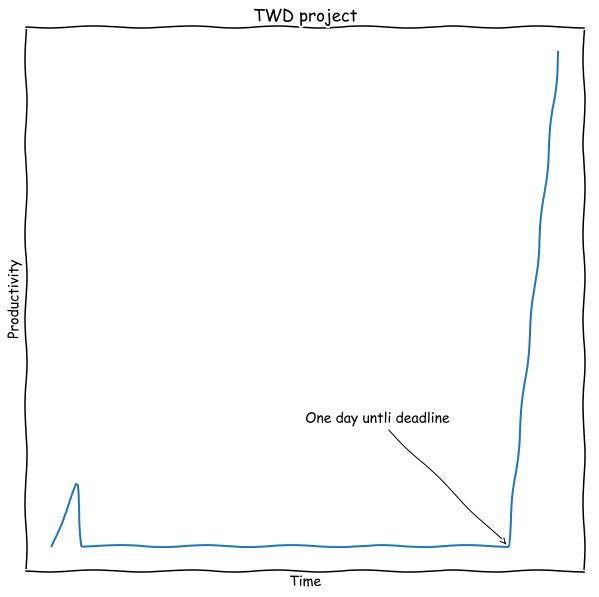

In [2]:
x = [0, 0.05, 0.06, 0.9, 1]
y = [0, 0.5, 0, 0, 4]

# rysowanie w xkcd mode
with plt.xkcd():
    # ustawienie rozmiaru
    plt.figure(figsize=(10,10))
    
    plt.plot(x,y)
    
    # usuniecie podpisow osi
    plt.xticks([])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("TWD project")
    plt.xlabel('Time')
    plt.ylabel('Productivity')

    plt.annotate(
        'One day untli deadline',
        xy=(0.9, 0), arrowprops=dict(arrowstyle='->'), xytext=(0.5, 1))
plt.show()

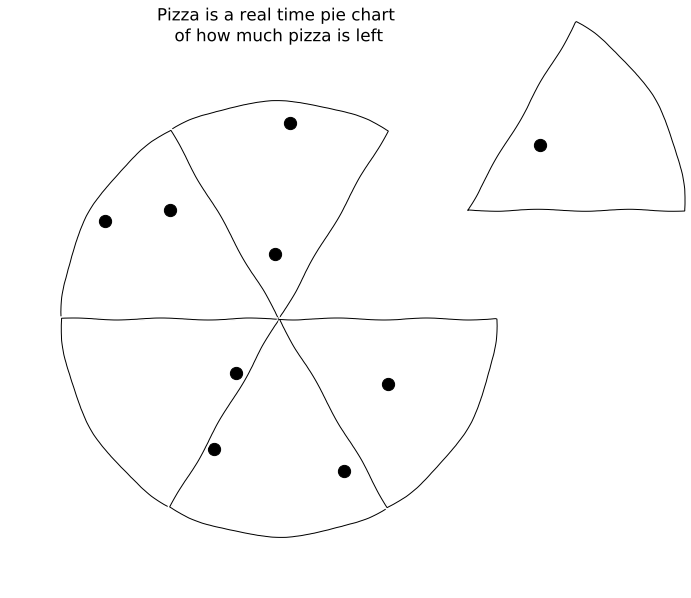

In [14]:
x = [60,60,60,60,60,60]

salami_x = [-0.5,0.3,1.2,-0.8,-0.3,0.5,-0.2,0.05,-0.02]
salami_y = [0.5,-0.7,0.8,0.45,-0.6,-0.3,-0.25,0.9,0.3]

with plt.xkcd():
    plt.figure(figsize = (10,10))
    plt.pie(x, colors = ["black" for i in range(6)],wedgeprops = {'fill':False}, explode = [True,False,False,False,False,False])
    plt.scatter(salami_x, salami_y, color = "black", s = 150 )
    plt.title("Pizza is a real time pie chart \nof how much pizza is left")

plt.show()